In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

import numpy as np
import matplotlib.pyplot as plt

In [1]:
#STEP1 torchvision.datasets.FashionMNIST()からデータを取ってきて、train_data,test_dataに格納しよう.

In [ ]:
print(train_data)
print(test_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /content
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /content
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
#STEP2 train_loaderとtest_loaderを定義使用(torch.utils.data.DataLoader)

In [ ]:
#STEP3 gpuを有効化して、device変数に"cuda"を格納
print(device)

cuda


In [5]:
#STEP4 モデルを定義しよう
class FashionClassifier(nn.Module):
    def __init__(self):
        super(FashionClassifier, self).__init__()
        #中間層/出力層をここに書く

    def forward(self, x):
        #順伝播をここに書く
        return x
model = FashionClassifier()
model.to(device)
print(model)

FashionClassifier()


In [6]:
#STEP5 損失関数と最適化手法を定義しよう
#hint: 損失関数はhttps://pytorch.org/docs/stable/nn.html のLoss Functionの項目をみよ 
#hint: 最適化手法はhttps://pytorch.org/docs/stable/optim.html のAlgorithmの項目を見よ

In [ ]:
#STEP6 学習をさせよう
epochs = 100
epoch_number = 0

for epoch in range(epochs):
    print('EPOCH {}:'.format(epoch_number + 1))
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):

        inputs, labels = inputs.to(device), labels.to(device)

        """

        ここに初期化、順伝播、誤差、誤差逆伝播、最適化を定義しよう
        hint: 前のNNのコードを参照
        
        """

        running_loss += loss.item()
        if i % 100 == 99:
            last_loss = running_loss / 100
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            running_loss = 0.0
        
    running_vloss = 0.0
    for i, vdata in enumerate(test_loader):
        vinputs, vlabels = vdata
        vinputs, vlabels = vinputs.to(device), vlabels.to(device)
        voutputs = model(vinputs)
        vloss = loss_fn(voutputs, vlabels)
        running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(loss, avg_vloss))
    epoch_number += 1
print("done")

In [ ]:
#STEP7　下記コードを実行して、モデルが正しく画像を認識していることを確認しよう
test_iter = iter(test_loader)
data, labels = test_iter.next()

In [ ]:
print(data[0])
print(labels[0])

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

Dress


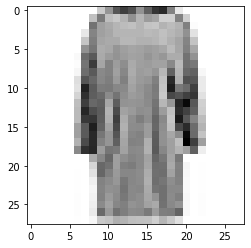

In [ ]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img * 255    # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
class_labels = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')
img_grid = torchvision.utils.make_grid(data[5])
matplotlib_imshow(img_grid, one_channel=True)
print(class_labels[labels[5]])

In [ ]:
pred = model(data[0].to(device))
label = torch.argmax(pred)
print(class_labels[label])

Sandal


In [ ]:
pred = model(data[5].to(device))
label = torch.argmax(pred)
print(class_labels[label])

Pullover


In [ ]:
#データの6つ目までのラベルと比較する
for i in range(6):
    pred = model(data[i].to(device))
    label = torch.argmax(pred)
    print(f"pred:{class_labels[label]}")
    print(f"true:{class_labels[labels[i]]}")
    print("====")

pred:Sandal
true:Sandal
====
pred:Sandal
true:Sandal
====
pred:Coat
true:Coat
====
pred:Trouser
true:Trouser
====
pred:Sneaker
true:Ankle Boot
====
pred:Pullover
true:Dress
====
